# ***The homework***

###**You must solve a binary classification problem.**

#### Eliminate from the analysis: education, native-country.
#### Combine occupation in only 5 categories
#### Divide into train 70% and validation 30%,  seed number 123
#### Apply Trees, Random Forests and Gradient Boosting
#### Look for the optimal hyperparameters for each model
#### Upload the notebook

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [220]:
df = pd.read_csv('data1.csv',skipinitialspace=True, na_values='?')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# ***Data Description***

### **Listing of attributes:**

- `Target:` >50K, <=50K   (the last variable, indicates the income)

- `age:` continuous.

- `workclass:` Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- `fnlwgt:` continuous.

- `education:` Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,
Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- `education-num:` continuous.

- `marital-status:` Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- `occupation:` Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- `relationship:` Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- `race:` White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- `sex:` Female, Male.

- `capital-gain:` continuous.

- `capital-loss:` continuous.

- `hours-per-week:` continuous.

- `native-country:` United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc),
India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,
Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### **Categorical Features:**  
`native-country`, `sex`, `race`, `relationship`, `occupation`, `marital-status`, `education`, `workclass`, `Target`

#### **Continuous Features:**  
`hours-per-week`, `capital-loss`, `capital-gain`, `education-num`, `fnlwgt`, `age`



### **Eliminate from the analysis: education, native-country.**

In [221]:
df.drop(columns=["education","native-country"],inplace=True)
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,>50K


### **Data cleaning**

In [222]:
print("Checking dataframe missing values:\n")
for column in df.columns:
    if df[column].isnull().sum() != 0:
        missingValue = df[column].isnull().sum()
        percentage = missingValue / len(df[column]) * 100
        dtype = df[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {missingValue}, percentage: {percentage:.2f}%")


del missingValue
del percentage
del dtype

Checking dataframe missing values:

The column: 'workclass' with Data Type: 'object' has missing value: 1836, percentage: 5.64%
The column: 'occupation' with Data Type: 'object' has missing value: 1843, percentage: 5.66%


### **Combine occupation in only 5 categories**

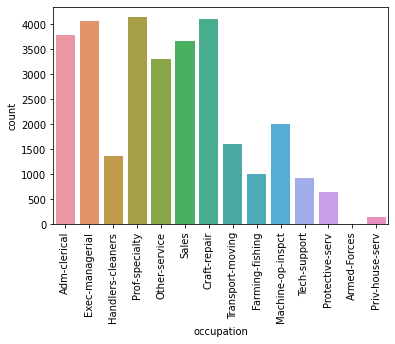

In [223]:
import seaborn as sns
categ = ["occupation"]
for nome in categ:
    ax = sns.countplot(x=nome, data=df,)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [224]:
df['occupation'] = df['occupation'].fillna(0)
df.drop(df[df['occupation'] == 0].index, inplace = True)


encode_occupation = {'Other-service':"other-services",'Armed-Forces':"other-services",
                     'Farming-fishing':'manual-worker', 'Machine-op-inspct':'manual-worker','Craft-repair':'simple-job',
                     'Handlers-cleaners':'simple-job', 'Priv-house-serv':"simple-job", 'Protective-serv':"simple-job",
                     'Transport-moving':"medium-level-job", 'Adm-clerical':"medium-level-job",'Sales':"medium-level-job",
                     'Tech-support':"medium-level-job",'Exec-managerial':"professional",'Prof-specialty':"professional"}

recod = df['occupation'].map(encode_occupation)
df['occupation'] = recod.astype('str')


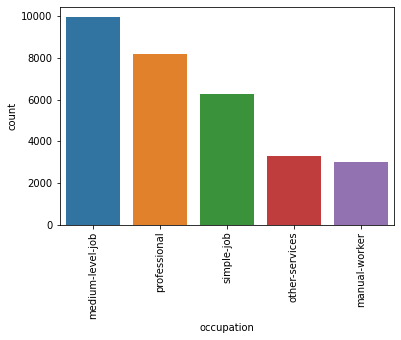

In [225]:
categ = ["occupation"]
for nome in categ:
    ax = sns.countplot(x=nome, data=df,)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [226]:
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,medium-level-job,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,professional,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,simple-job,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,simple-job,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,professional,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,professional,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,5,Married-spouse-absent,other-services,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,professional,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,14,Never-married,professional,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,13,Married-civ-spouse,professional,Husband,White,Male,5178,0,40,>50K


### **Encoding**

In [227]:

categ = ["workclass",	"marital-status",	"occupation", "relationship",	"race",	"sex"]

df = pd.get_dummies(df,columns=["workclass",	"marital-status",	"occupation", "relationship",	"race",	"sex"],
               prefix=["work",	"status",	"occupation", "relationship",	"race",	"sex"])

df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,work_Federal-gov,work_Local-gov,work_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0,0,1,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,<=50K,0,0,1,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,<=50K,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [228]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'work_Federal-gov', 'work_Local-gov',
       'work_Private', 'work_Self-emp-inc', 'work_Self-emp-not-inc',
       'work_State-gov', 'work_Without-pay', 'status_Divorced',
       'status_Married-AF-spouse', 'status_Married-civ-spouse',
       'status_Married-spouse-absent', 'status_Never-married',
       'status_Separated', 'status_Widowed', 'occupation_manual-worker',
       'occupation_medium-level-job', 'occupation_other-services',
       'occupation_professional', 'occupation_simple-job',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male'],
      dtype='object')

### **Divide into train 70% and validation 30%,  seed number 123**

In [229]:
train_df, val_df = train_test_split(df, test_size=0.3, random_state=123)
print(train_df['target'].value_counts())
print(val_df['target'].value_counts())

<=50K    16122
>50K      5380
Name: target, dtype: int64
<=50K    6946
>50K     2270
Name: target, dtype: int64


### **Balance classes**

In [230]:
class_0 =train_df[train_df['target']==">50K"]
class_1 =train_df[train_df['target']=="<=50K"]

newdata = class_1.sample(len(class_0),replace=True)
print(len(newdata))

5380


In [231]:
train_df = pd.concat([class_0,newdata],axis=0)
train_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,work_Federal-gov,work_Local-gov,work_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
31070,44,202872,12,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,1,0
24415,54,137065,16,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,1,0
27610,35,253006,10,7688,0,38,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
28989,46,58683,13,15024,0,55,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9672,37,191841,13,8614,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26913,25,109526,9,0,0,38,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,1
23322,23,391171,10,0,0,25,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,1
24942,25,178478,13,0,0,40,<=50K,0,0,1,...,1,0,0,0,0,0,0,1,1,0
15958,24,186831,10,0,0,45,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [232]:
print(train_df['target'].value_counts())

>50K     5380
<=50K    5380
Name: target, dtype: int64


In [233]:
train_df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'work_Federal-gov', 'work_Local-gov',
       'work_Private', 'work_Self-emp-inc', 'work_Self-emp-not-inc',
       'work_State-gov', 'work_Without-pay', 'status_Divorced',
       'status_Married-AF-spouse', 'status_Married-civ-spouse',
       'status_Married-spouse-absent', 'status_Never-married',
       'status_Separated', 'status_Widowed', 'occupation_manual-worker',
       'occupation_medium-level-job', 'occupation_other-services',
       'occupation_professional', 'occupation_simple-job',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male'],
      dtype='object')

### **Separate the target**

In [234]:
y_train = train_df['target']
X_train = train_df.drop(labels=['target'],axis=1)
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,work_Federal-gov,work_Local-gov,work_Private,work_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
31070,44,202872,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
24415,54,137065,16,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
27610,35,253006,10,7688,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
28989,46,58683,13,15024,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
9672,37,191841,13,8614,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26913,25,109526,9,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
23322,23,391171,10,0,0,25,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
24942,25,178478,13,0,0,40,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
15958,24,186831,10,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [235]:
y_val = val_df['target']
X_val = val_df.drop(labels=['target'],axis=1)
X_val

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,work_Federal-gov,work_Local-gov,work_Private,work_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
23369,28,249870,15,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
18408,47,181130,15,99999,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
25689,40,303291,10,0,0,35,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
31415,39,314822,10,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
27061,45,221780,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22520,44,187720,9,0,0,41,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1334,51,146767,11,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
29566,44,197344,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
7408,48,141483,10,0,0,40,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


### **Apply Trees, Random Forests and Gradient Boosting**

### **Random forests**

In [236]:
clf1 = RandomForestClassifier(n_estimators=300, max_depth=32, min_samples_split=15, min_samples_leaf=8, oob_score=True)
clf1.fit(X_train,y_train)


RandomForestClassifier(max_depth=32, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=300, oob_score=True)

### **Trees**

In [237]:
clf2 = DecisionTreeClassifier(min_samples_split=15,min_samples_leaf=8)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=15)



### **Evaluation**

In [239]:
y_pred1 = clf1.predict(X_val)
print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

       <=50K       0.95      0.78      0.86      6946
        >50K       0.56      0.88      0.68      2270

    accuracy                           0.80      9216
   macro avg       0.76      0.83      0.77      9216
weighted avg       0.85      0.80      0.81      9216



In [240]:
y_pred2 = clf2.predict(X_val)
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

       <=50K       0.92      0.79      0.85      6946
        >50K       0.55      0.79      0.65      2270

    accuracy                           0.79      9216
   macro avg       0.73      0.79      0.75      9216
weighted avg       0.83      0.79      0.80      9216



### **Confusion matrix**

In [241]:
confusion_matrix(y_val,y_pred1)

array([[5400, 1546],
       [ 283, 1987]])

In [242]:
confusion_matrix(y_val,y_pred2)

array([[5483, 1463],
       [ 484, 1786]])

### **Change the threshold**

In [243]:
y_prob1 = clf1.predict_proba(X_val)
y_prob1

array([[0.53389053, 0.46610947],
       [0.00994598, 0.99005402],
       [0.5788163 , 0.4211837 ],
       ...,
       [0.75645529, 0.24354471],
       [0.83122998, 0.16877002],
       [0.31661654, 0.68338346]])

In [244]:
y_prob2 = clf2.predict_proba(X_val)
y_prob2

array([[0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.9       , 0.1       ],
       ...,
       [0.9       , 0.1       ],
       [0.75      , 0.25      ],
       [0.5       , 0.5       ]])

## AUC

In [261]:
from sklearn import metrics
print(metrics.roc_auc_score(y_val, y_prob1[:,1]))
print(metrics.roc_auc_score(y_val, y_prob2[:,1]))

0.9112280576023218
0.8676021187993976


## ROC

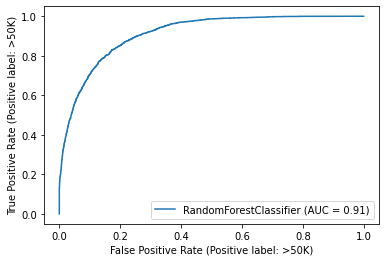

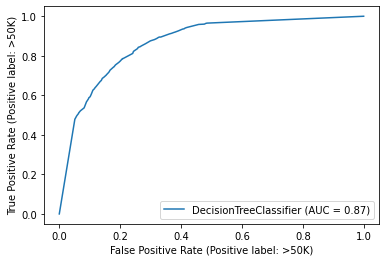

In [262]:
RocCurveDisplay.from_estimator(clf1, X_val, y_val)
RocCurveDisplay.from_estimator(clf2, X_val, y_val)

# Gradient Boosting

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [266]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, subsample=0.6, learning_rate=0.05)
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, subsample=0.6)

In [268]:
predictions = clf.predict_proba(X_val)
np.savetxt("sample.txt", predictions, delimiter =", ")

## HistGradientBoostingClassifier

class sklearn.ensemble.HistGradientBoostingClassifier(loss='auto', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)

In [269]:
X_train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'work_Federal-gov', 'work_Local-gov', 'work_Private',
       'work_Self-emp-inc', 'work_Self-emp-not-inc', 'work_State-gov',
       'work_Without-pay', 'status_Divorced', 'status_Married-AF-spouse',
       'status_Married-civ-spouse', 'status_Married-spouse-absent',
       'status_Never-married', 'status_Separated', 'status_Widowed',
       'occupation_manual-worker', 'occupation_medium-level-job',
       'occupation_other-services', 'occupation_professional',
       'occupation_simple-job', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male'],
      dtype='object')

In [277]:
from sklearn.ensemble import HistGradientBoostingClassifier
lista=[False,True,True,True,False,False,True,True,False,True,True,True,True,False,
       True,True,True]
clf = HistGradientBoostingClassifier(categorical_features=lista, loss='binary_crossentropy',
                                     max_iter=300,learning_rate=0.05)